<a href="https://colab.research.google.com/github/sonuj04/Gray-Interface-Tasks/blob/main/gi_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None



In [ ]:
df = pd.read_csv("/content/Book-1-The-Philosopher-s-Stone.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df1 = df.astype(str)

CONVERTING TO LOWERCASE


In [ ]:

df1.iloc[:, 0] = df1.iloc[:, 0].str.lower()
df1.head()

REMOVING PUNCTUATIONS


In [ ]:
def punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df1.iloc[:, 0] = df1.iloc[:, 0].apply(punctuation)

print(df1.head())


REMOVING STOPWORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords1 = set(stopwords.words('english'))
stopwords1

In [ ]:
def remove_stopwords(text):
    words = text.split() # Splitting into words
    filtered_words = [word for word in words if word.lower() not in stopwords1]
    return ' '.join(filtered_words)

In [ ]:
df1.iloc[:, 0] = df1.iloc[:, 0].apply(remove_stopwords)

df1.head()

REMOVING FREQUENT WORDS


In [ ]:
from collections import Counter
cnt = Counter()
for text in df1.iloc[:, 0].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):

    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df1.iloc[:, 0] = df1.iloc[:, 0].apply(lambda text: remove_freqwords(text))
df1.head(20)

REMOVING RARE WORD

In [ ]:
#tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

all_words = df1.iloc[:, 0].dropna().apply(tokenize).explode()

# frequencies
word_counts = Counter(all_words)

print(word_counts)



In [ ]:
#threshold for rare words
threshold = 5

rare_words = {word for word, count in word_counts.items() if count < threshold}

print(rare_words)


In [ ]:
def remove_rare_words(text, rare_words):
    words = tokenize(text)
    filtered_words = [word for word in words if word not in rare_words]
    return ' '.join(filtered_words)

df1.iloc[:, 0] = df1.iloc[:, 0].apply(lambda x: remove_rare_words(x, rare_words) if pd.notna(x) else x)

print(df1.head(20))


LEMMATIZATION

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet # import the wordnet module

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df1.iloc[:, 0] = df1.iloc[:, 0].apply(lambda text: lemmatize_words(text))
df1.head()

WORD CLOUD

In [ ]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

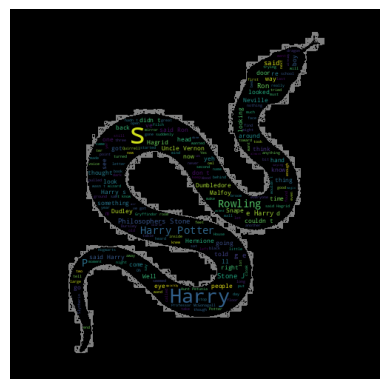

In [ ]:
text = open("/content/Book-1-The-Philosopher-s-Stone.csv", 'r').read()

mask = np.array(Image.open('/content/snake-icon-vector-48580874.jpg'))

wcloud = WordCloud(stopwords = STOPWORDS,
                   mask = mask,
                   width=200,
                   height=400,
                   background_color = 'black',
                   contour_color = 'gray',
                   contour_width = 1
                   ).generate(text)
plt.imshow(wcloud)
plt.axis('off')
plt.show()



In [ ]:
wcloud.to_file("hp_wcloud.jpg")

**BIGRAM MODEL TASK 2**

In [ ]:
df1 = df1[df1.iloc[:,0] != '']
df1.head(25)

In [ ]:
words=df1.iloc[:, 0].tolist()

In [ ]:
words.count(1)

0

In [ ]:
words[:10]

In [ ]:
len(words)

13283

In [ ]:
b = {}
for w in words[:1]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip ( chs, chs[1:]) :
    bigram=(ch1,ch2)
    b[bigram] = b.get(bigram, 0) +1
    print(ch1,ch2)

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip ( chs, chs[1:]) :
    bigram=(ch1,ch2)
    b[bigram] = b.get(bigram, 0) +1


In [ ]:
b

In [ ]:
sorted(b.items(), key=lambda kv: kv[1])

In [ ]:
import torch

In [ ]:
N=torch.zeros((27,27), dtype=torch.int32)

In [ ]:
chars=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chars)}


In [ ]:
stoi1=stoi
stoi1

In [ ]:

for i, letter in enumerate(string.ascii_lowercase):
    stoi1[letter] = i+1

stoi1


In [ ]:
stoi1['.']=0

stoi1

In [ ]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip ( chs, chs[1:]) :
    ix1=stoi1[ch1]
    ix2=stoi1[ch2]
    N[ix1,ix2] +=1



In [ ]:


stoi1[' '] = len(stoi1)


for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi1[ch1]
        ix2 = stoi1[ch2]
        N[ix1, ix2] += 1

In [ ]:

N = torch.zeros((len(stoi1) + 1, len(stoi1) + 1), dtype=torch.int32)
stoi1[' '] = len(stoi1)

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi1[ch1]
        ix2 = stoi1[ch2]
        N[ix1, ix2] += 1

KeyError: '1'

In [ ]:

N = torch.zeros((len(stoi1) + 1, len(stoi1) + 1), dtype=torch.int32)

stoi1[' '] = len(stoi1)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):

        if ch1 in stoi1 and ch2 in stoi1:
            ix1 = stoi1[ch1]
            ix2 = stoi1[ch2]
            N[ix1, ix2] += 1

In [ ]:
N.size()

torch.Size([28, 28])

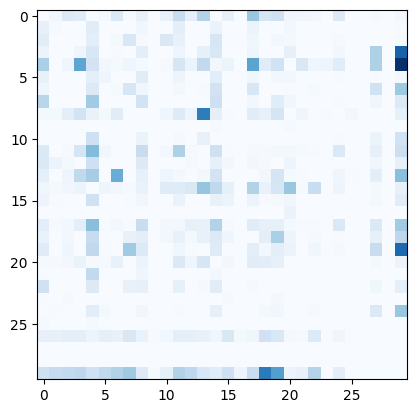

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(N, cmap='Blues')

In [ ]:
itos = {i: s for s, i in stoi1.items()}

In [ ]:
itos

(-0.5, 27.5, 27.5, -0.5)

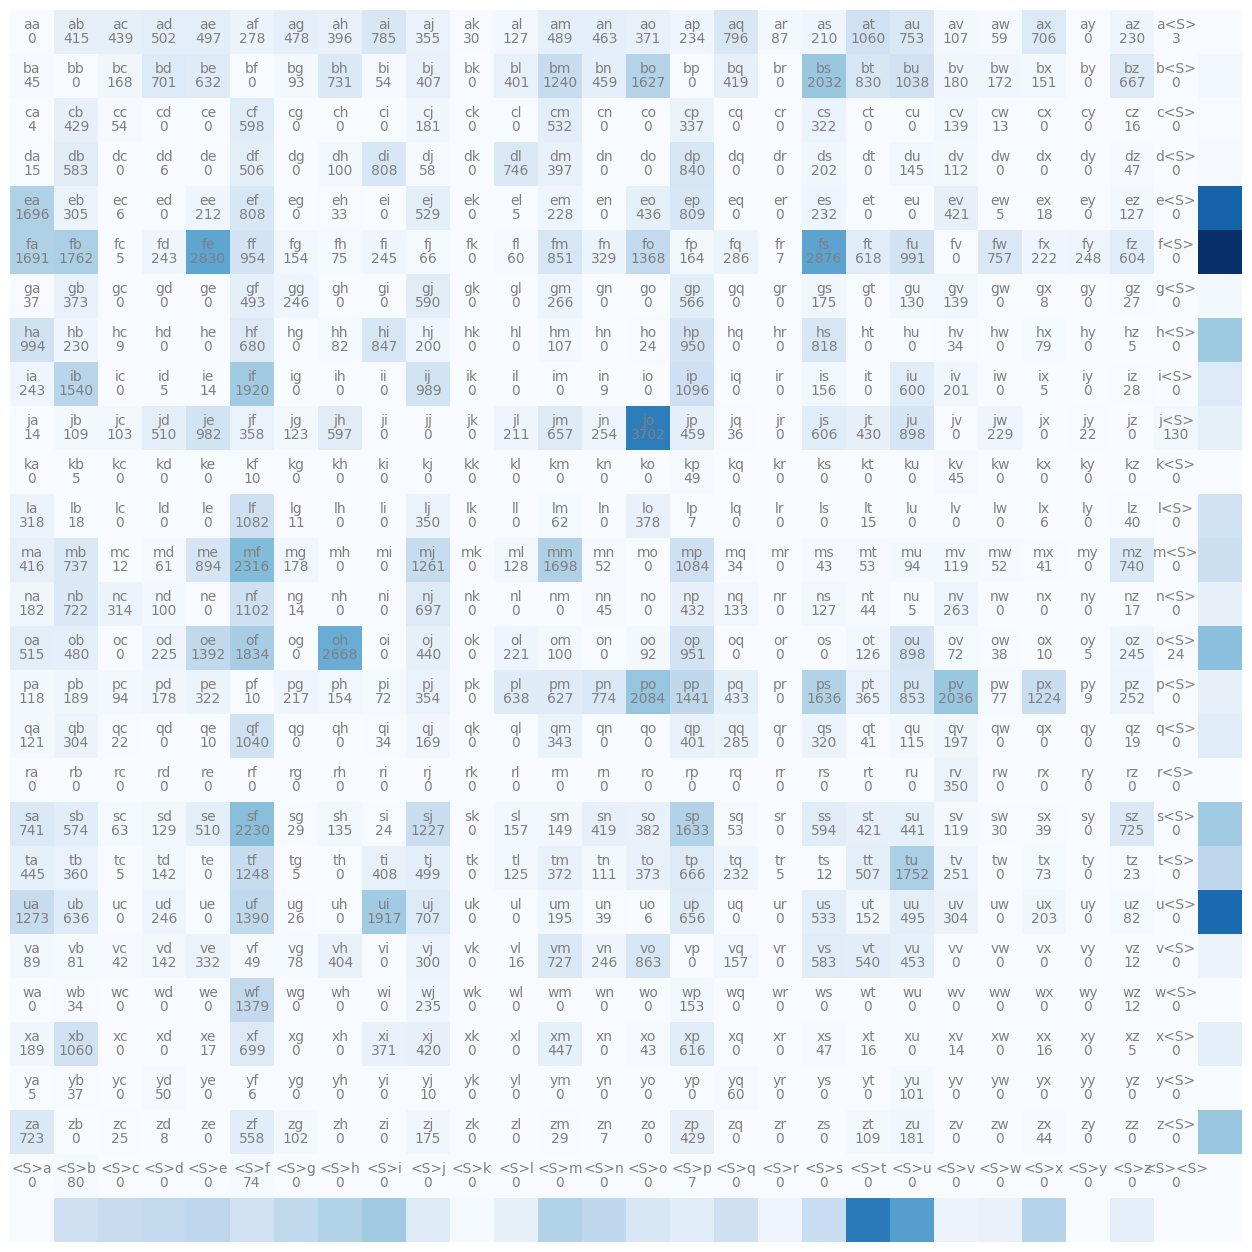

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [ ]:
N[0, :]

tensor([   0,  415,  439,  502,  497,  278,  478,  396,  785,  355,   30,  127,
         489,  463,  371,  234,  796,   87,  210, 1060,  753,  107,   59,  706,
           0,  230,    3,    0], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0420, 0.0445, 0.0509, 0.0504, 0.0282, 0.0484, 0.0401, 0.0795,
        0.0360, 0.0030, 0.0129, 0.0495, 0.0469, 0.0376, 0.0237, 0.0806, 0.0088,
        0.0213, 0.1074, 0.0763, 0.0108, 0.0060, 0.0715, 0.0000, 0.0233, 0.0003,
        0.0000])

In [ ]:
p.sum()

tensor(1.)

In [ ]:
g= torch.Generator().manual_seed(2147483647)
p =torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
g= torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [ ]:

for i in range (20):
  out = []
  ix=0
  while True:
    p=N[ix].float()
    p=p/p.sum()
    ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

    out.append(itos[ix])
    if ix == 0:
     break

  print(''.join(out))


dpsfbztfopo<E>u<E>qbm<E>ea
xfe<E>npvjn<E>zgjoa
uibqtopnppjnpvtvtiuphpsfnju<E>uijm<E>tfsf<E>ibn<E>ipua
qussfsjujo<E>nfz<E>sa
nnf<E>vnf<E>tive<E>xibmfwfwfs<E>bssa
xfoeveepuuboh<E>mzfbcfmza
jhjofbsnqpu<E>muifnjnbubxbua
gga
tfyqmmfwfmjujlf<E>tbmpxpnfso<E>tf<E>xbgmf<E>uff<E>s<E>ibufbsz<E>x<E>nvs<E>tpe<E>t<E>tqq<E>pojpmjmqfshibjufbs<E>h<E>dmbl<E>zxiffs<E>tf<E>ijwppnfibdfme<E>u<E>njopvto<E>epjoa
qfa
oh<E>qf<E>u<E>x<E>hpx<E>fxfe<E>tudmfs<E>npo<E>nbssbohfsfspppubs<E>l<E>la
ef<E>jha
qpohiebcfwfepohfbttuvh<E>ujmza
vtuiupvdfea
u<E>e<E>dpe<E>e<E>xmmje<E>tif<E>xmfmplf<E>tme<E>efnboha
na
tu<E>nbea
ea
ifwfhfa
q<E>sejmmjwf<E>ca


In [ ]:
bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
bigrams

In [ ]:
bigram_counts = Counter(bigrams)

In [ ]:
bigram_counts

In [ ]:
from collections import defaultdict

In [ ]:
bigram_freq = defaultdict(Counter)

In [ ]:
for (w1, w2), count in bigram_counts.items():
    bigram_freq[w1][w2] = count

In [ ]:
bigram_freq

In [ ]:
bigram_prob = {}
for (w1, next_words) in bigram_freq.items():
    total_count = sum(next_words.values())
    bigram_prob[w1] = {w2: count / total_count for w2, count in next_words.items()}

In [ ]:
import torch, random

In [ ]:
def generate_text(start_word, bigram_prob, max_words = 200, threshold = 0.001):
    current_word = start_word
    generated_text = [current_word]

    for _ in range(max_words):
        if current_word not in bigram_prob:
            break

        next_words = list(bigram_prob[current_word].keys())
        probabilities = list(bigram_prob[current_word].values())


        prob_tensor = torch.tensor(probabilities)
        next_word_idx = torch.multinomial(prob_tensor, 1).item()
        next_word = next_words[next_word_idx]


        if bigram_prob[current_word][next_word] < threshold:
            break

        generated_text.append(next_word)
        current_word = next_word

    return ' '.join(generated_text)

In [ ]:
start_word = 'harry'
generated_text = generate_text(start_word, bigram_prob)
print(generated_text)

harry see potter still famous not i m going you hermione passed together there mom look p g e rowling but yeh must know yer mom dad i mean they re famous you re famous what mom dad weren t famous they yeh don know yeh don know hagrid ran finger hair stare yeh don know yeh are finally uncle vernon suddenly found voice stop stop right sir tell boy anything man vernon dursley would furious look hagrid gave hagrid spoke every you never told never told letter dumbledore left fer saw dumbledore leave dursley an you ve kept year then met school left got course knew you d strange please went got blown got landed you p g e rowling blue smoke inside exploded s hat several live white high table dumbledore pointed wizard s hat joke professor flitwick read christmas followed percy nearly broke teeth silver watched hagrid getting face called finally professor mcgonagall harry s top hat finally left table thing pack new wizard chess set white disappeared nasty feeling going end mr norris s christmas 

In [ ]:
start_word = 'voldemort'
generated_text = generate_text(start_word, bigram_prob)
print(generated_text)

voldemort could touch reason touch person something good dumbledore became interested gave time eye found voice and invisibility cloak know sent me p g e rowling potter oliver wood wood i ve found seeker thing people didn t minute s feather noticed large silver key bent wing already caught that one called others that big one bright blue wing feather one side p g e rowling relieved find wasn t mile behind everyone else lot people come muggle family like hadn t idea witch wizard much learn even people like didn t much head start important day finally managed find way great hall breakfast without getting lost what got today asked potion slytherins snape s head slytherin house say always we ll able see it s true wish mcgonagall u professor mcgonagall head gryffindor house hadn t stopped giving huge pile homework day mail arrived gotten used given bit shock first morning hundred owl suddenly great hall breakfast table saw letter onto hedwig hadn t brought anything far sometimes flew ear bit

In [ ]:
start_word = 'ron'
generated_text = generate_text(start_word, bigram_prob)
print(generated_text)

ron look don t hurry he ll already stone then sir harry please madam pomfrey thrown out swallowed looked around realized must hospital wing lying bed white sheet next table piled high looked like half shop friend dumbledore beaming what happened dungeon professor quirrell secret whole school know believe friend fred george weasley trying send toilet seat thought would madam pomfrey however felt might it p g e rowling didn t miss single one wood delighted half hour night really fallen couldn t carry that quidditch cup ll name year wood happily back castle i wouldn t surprised turn better charlie weasley could hadn t gone dragon perhaps busy quidditch practice three week top homework could hardly believe realized he d already hogwarts two castle felt like home privet drive ever lesson becoming interesting halloween morning woke smell corridor even better professor flitwick charm thought ready start making fly something try since they d seen make neville s toad around classroom professor 